# Fraud detection - Data Understanding

I have used the github copilot exentsion to write the code, it uses my reposetories to predict what i want to write based on the first few words of code. 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

💬 **Interpret this output:** What does it tell you about the data?

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/Patrick0481/Data-science-for-business/refs/heads/main/Week2_Fraud_Detection.csv?token=GHSAT0AAAAAADMGVMALDQKAOVOYMJL2ZVH42G3Z4RQ'
df = pd.read_csv(url)
print(df.head())
print(df.info())

#This shows the different columns and their data types

   Transaction_ID  Amount  Customer_Age Merchant_Risk  Location_Match  \
0               1   46.93            62           Low               1   
1               2  301.01            49        Medium               1   
2               3  131.67            69           Low               1   
3               4   91.29            47           Low               1   
4               5   16.96            64           Low               1   

  Time_of_Day  Fraudulent  
0       Night           0  
1     Morning           0  
2     Evening           0  
3   Afternoon           0  
4     Morning           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  300 non-null    int64  
 1   Amount          300 non-null    float64
 2   Customer_Age    300 non-null    int64  
 3   Merchant_Risk   300 non-null    object 
 4   Location_Match

💬 **Interpret this output:** What does it tell you about the data?

In [ ]:
# Check for missing values and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

#There are no missing values or duplicates in the dataset

Transaction_ID    0
Amount            0
Customer_Age      0
Merchant_Risk     0
Location_Match    0
Time_of_Day       0
Fraudulent        0
dtype: int64
0


💬 **Interpret this output:** What does it tell you about the data?

In [ ]:
# Summary stats
print(df.describe())

#Rows: 300
#Amount mean ≈ 97.28, median ≈ 71.68, max 461.06
#Fraudulent: 26 (8.67%)
#Non-Fraudulent: 274 (91.33%) 
#Merchant_Risk counts: Low 188, Medium 84, High 28

       Transaction_ID      Amount  Customer_Age  Location_Match  Fraudulent
count      300.000000  300.000000    300.000000      300.000000  300.000000
mean       150.500000   97.279000     43.983333        0.833333    0.086667
std         86.746758   91.807597     14.746795        0.373301    0.281816
min          1.000000    0.510000     18.000000        0.000000    0.000000
25%         75.750000   27.325000     31.000000        1.000000    0.000000
50%        150.500000   71.685000     44.000000        1.000000    0.000000
75%        225.250000  141.412500     56.000000        1.000000    0.000000
max        300.000000  461.060000     69.000000        1.000000    1.000000


💬 **Interpret this output:** What does it tell you about the data?

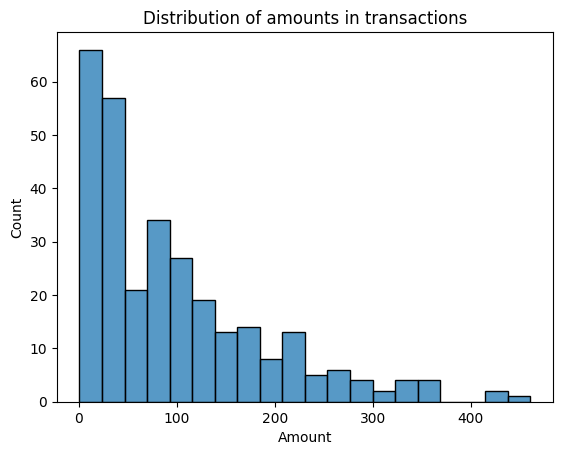

In [ ]:
#Distribution of amounts in transactions
sns.histplot(df["Amount"], bins=20)
plt.title("Distribution of amounts in transactions")
plt.show()

#This shows that most transactions are below 200, with a few outliers above that amount.
#At first glance it seems that fraudulent transactions are more likely to be of higher amounts, but further analysis is needed to confirm this.

💬 **Interpret this output:** What does it tell you about the data?

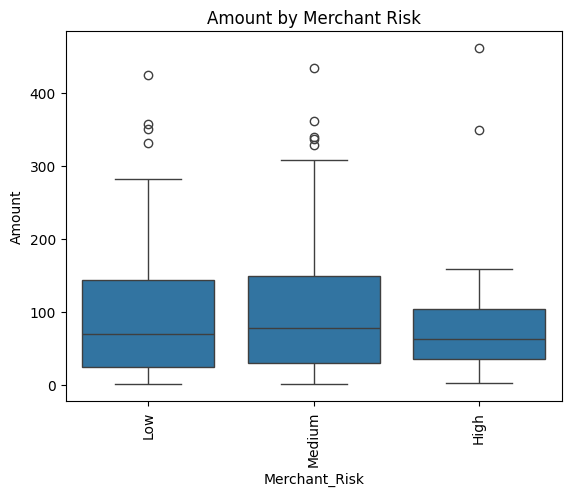

In [ ]:
# Boxplot of Amount by Merchant Risk
sns.boxplot(x="Merchant_Risk", y="Amount", data=df)
plt.title("Amount by Merchant Risk")
plt.xticks(rotation=90)
plt.show()

#High-risk merchants actually have a lower median and tighter spread of amounts compared to low and medium-risk merchants.

💬 **Interpret this output:** What does it tell you about the data?

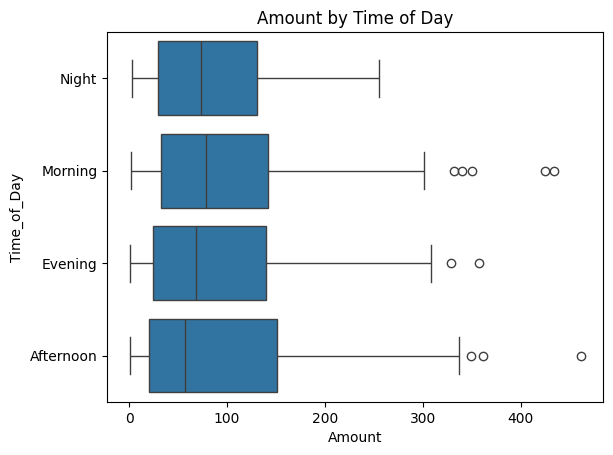

In [ ]:
# Boxplot of Amount by Time of Day
sns.boxplot(x="Amount", y="Time_of_Day", data=df)
plt.title("Amount by Time of Day")
plt.show()

#Transactions in the afternoon (12-18) have a higher median amount and wider spread, while early morning (0-6) transactions are generally lower amounts.
#There isn't a clear link between time of day and fraud from this plot.

💬 **Interpret this output:** What does it tell you about the data?

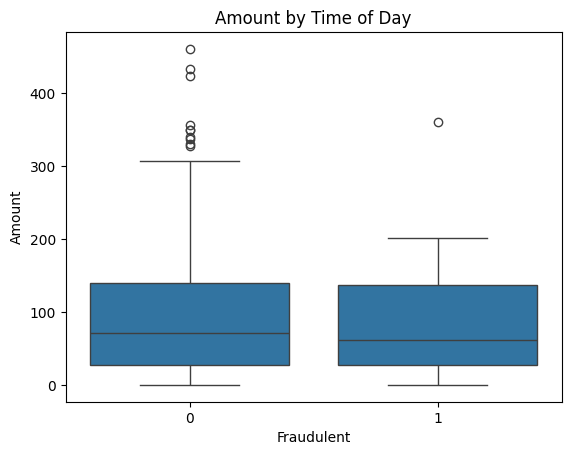

In [ ]:
# Boxplot of Amount by Time of Day
sns.boxplot(x="Fraudulent", y="Amount", data=df)
plt.title("Amount by Fraudulent")
plt.show()

#Non-fraudulent transactions have a higher median amount and wider spread, indicating fraudsters may try to strear clear of higher-value transactions.

C:\Users\patri\AppData\Local\Temp\ipykernel_25572\4107967134.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Merchant_Risk", "Amount_bin"])["Fraudulent"]


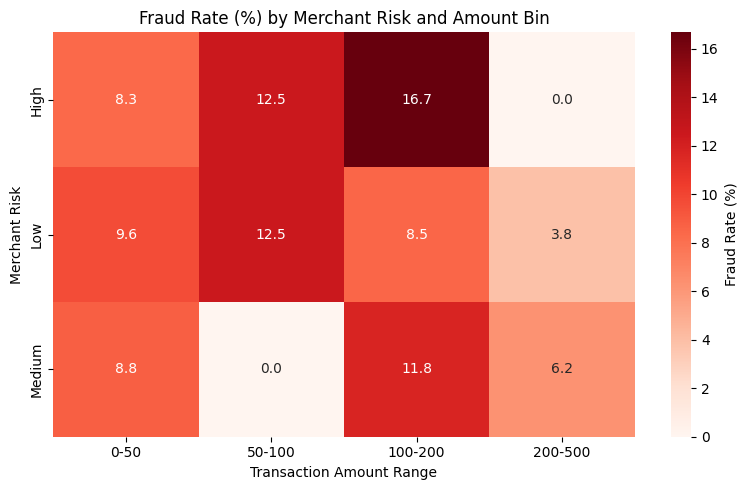

In [ ]:
#Create Amount bins
df["Amount_bin"] = pd.cut(df["Amount"],                     
bins=[0,50,100,200,500], 
labels=["0-50","50-100","100-200","200-500"])

#Group by Merchant_Risk and Amount_bin, compute fraud rate (%)
fraud_rate_combo = (
df.groupby(["Merchant_Risk", "Amount_bin"])["Fraudulent"]
.mean()
.reset_index()
)

fraud_rate_combo["Fraudulent"] = fraud_rate_combo["Fraudulent"] * 100

#Pivot table for heatmap
pivot_table = fraud_rate_combo.pivot(index="Merchant_Risk", 
columns="Amount_bin", 
values="Fraudulent")

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Fraud Rate (%)'})
plt.title("Fraud Rate (%) by Merchant Risk and Amount Bin")
plt.ylabel("Merchant Risk")
plt.xlabel("Transaction Amount Range")
plt.tight_layout()
plt.show()

#Fraud is most frequent in High-risk merchants (as expected), but surprisingly, Low-risk merchants still show a non-negligible rate.
#By amount, fraud peaks around 100–200 but actually drops for very high transactions (200+). This could mean fraudsters prefer medium-value transactions to avoid detection.